# HIV Model
Kristin Aoki

In [3]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [4]:
#def make_system(alpha,beta,pi,gamma,delta,mu,sigma,tao,rho):

    #init=State(R=200, 
           #L=0, 
           #E=0, 
           #V=4e-7)
    #init /= np.sum(init)
    
    #t0=0
    #t_end=120
    #dt= 0.1
    
    #return System(init=init, t0=t0, t_end=t_end, dt=dt, alpha=alpha, beta=beta, 
                  #pi=pi, gamma=gamma, delta=delta, mu=mu, sigma=sigma, tao=tao, rho=rho)

In [36]:
system = System(alpha = 0.036,beta = 0.00027,pi = 100,gamma = 1.36,delta = 0.33,mu = 0.00136,sigma = 2,tao = 0.2,rho = 0.1,t0=0,t_end=120,dt=0.1)



,values
alpha,0.03600
beta,0.00027
pi,100.00000
gamma,1.36000
delta,0.33000
mu,0.00136
sigma,2.00000
tao,0.20000
rho,0.10000
t0,0.00000


In [43]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    print(frame)
    return frame
    

In [44]:
def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (s, i, r)
    t: time
    system: System object
    
    returns: State (sir)
    """
    r,l,e,v = state

    deltar = (system.gamma*system.tao) -  (system.mu*r) - (system.beta*r*v)
    deltal = (system.rho*system.beta*r*v) - (system.mu*l) - (system.alpha*l)
    deltae = ((1-system.rho)*(system.beta*r*v)) + (system.alpha*l) - (system.delta*e)
    deltav = (system.pi*e) - (system.sigma*v)
    
    r += deltar*system.dt
    l += deltal*system.dt
    e += deltae*system.dt
    v += deltav*system.dt
    
    return State(R=r, L=l, E=e, V=v)

In [45]:
init = State(R=200, L=0,E=0,V=4e-7)

,values
R,2.000000e+02
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [46]:
update_func(init,0,system)

,values
R,2.000000e+02
L,2.160000e-10
E,1.944000e-09
V,3.200000e-07


In [47]:
results = run_simulation(system, update_func)
results.head()

                R             L             E             V
0.0    200.000000  0.000000e+00  0.000000e+00  4.000000e-07
0.1    200.000000  2.160000e-10  1.944000e-09  3.200000e-07
0.2    200.000000  3.879930e-10  3.435826e-09  2.754400e-07
0.3    200.000000  5.352811e-10  4.662479e-09  2.547103e-07
0.4    200.000000  6.708248e-10  5.748436e-09  2.503930e-07
0.5    200.000000  8.035308e-10  6.778062e-09  2.577987e-07
0.6    200.000000  9.397402e-10  7.810181e-09  2.740196e-07
0.7    200.000000  1.084200e-09  8.887563e-09  2.973175e-07
0.8    200.000000  1.240701e-09  1.004314e-08  3.267296e-07
0.9    200.000000  1.412500e-09  1.130409e-08  3.618151e-07
1.0    200.000000  1.602603e-09  1.269456e-08  4.024930e-07
1.1    200.000000  1.813961e-09  1.423752e-08  4.489400e-07
1.2    200.000000  2.049612e-09  1.595607e-08  5.015272e-07
1.3    200.000000  2.312779e-09  1.787432e-08  5.607824e-07
1.4    200.000000  2.606961e-09  2.001819e-08  6.273691e-07
1.5    200.000000  2.936001e-09  2.24159

,R,L,E,V
0.0,200.0,0.000000e+00,0.000000e+00,4.000000e-07
0.1,200.0,2.160000e-10,1.944000e-09,3.200000e-07
0.2,200.0,3.879930e-10,3.435826e-09,2.754400e-07
0.3,200.0,5.352811e-10,4.662479e-09,2.547103e-07
0.4,200.0,6.708248e-10,5.748436e-09,2.503930e-07


In [55]:
def plot_results(R, L, E):

    plot(R, '--', label='Uninfected')
    plot(L, '-', label='Latently Infected')
    plot(E, ':', label='Actively Infected')
    plt.yscale('log')
    plt.axis([0,120,1e-1,1e2])
    decorate(xlabel='Time (days)')

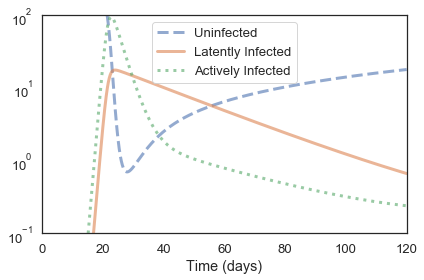

In [56]:
plot_results(results.R, results.L, results.E)

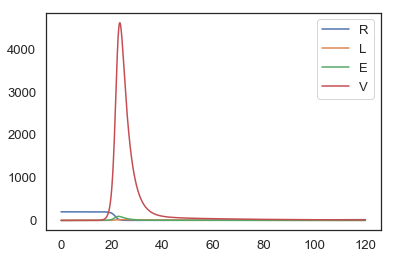

In [57]:
results.plot()

In [58]:
def plot_results (V):
    plot(V, ':', label='Free Virions')
    plt.yscale('log')

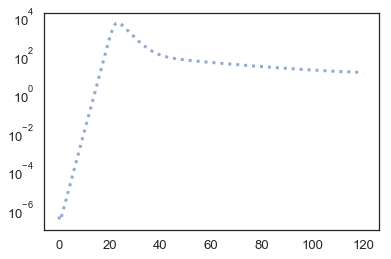

In [52]:
plot_results (results.V)